In [24]:
import numpy as np
import matplotlib.pylab as plt
# import matplotlib
import matti_func as matti

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })


n=1.5
fs = 15
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5))]
lw = 2  # plt default: 1.5

SAVE = True;
save_d = "/home/matti/Documents/data/trees_benchmark/"

In [25]:
# copia incollato tutto a mano... tanto ste tabelle non verrano MAI cambiate. E di sicuro non ne faro' altre.
N = np.array([2048,8192,16384,32768,65536,131072])

search = np.array([N,N/2,N/8,N/32,N/128,[1,1,1,1,1,1]], dtype=int)
print(search)

labs = [r"$N$",r"$N/2$",r"$N/8$",r"$N/32$",r"$N/128$",r"$1$"]

ANN_treecpu = np.array([0.0004,0.00462482,0.003092,0.000877,0.000543,0.000411,0.000279,
                        0.0021,0.016933,0.008933,0.00242,0.000952,0.000451,0.000222,
                        0.0048,0.032,0.016673,0.004371,0.002089,0.000601,0.000221,
                        0.01,0.0625326,0.033029,0.0088,0.002476,0.000901,0.000239,
                        0.021,0.137189,0.069479,0.017101,0.00491,0.001504,0.000224,
                        0.045222,0.296503,0.16367,0.034949,0.009663,0.002763,0.000222]).reshape([6,7])
FLANN_treegpu = np.array([0.012,0.001632,0.001461,0.001452,0.001244,0.000894,0.000138,
                        0.011381,0.00359,0.0025,0.001986,0.001981,0.001703,0.000124,
                        0.012502,0.008179,0.003605,0.002192,0.00203,0.002114,0.000172,
                        0.013591,0.017061,0.008091,0.002836,0.002216,0.002281,0.000186,
                        0.014895,0.037077,0.020604,0.004753,0.002947,0.002385,0.000127,
                        0.019491,0.083442,0.044135,0.013324,0.003283,0.003008,0.00017]).reshape([6,7])
FAISS_treegpu = np.array([0.95,0.001464,0.000983,0.000512,0.000432,0.000383,0.000497,
                        0.932561,0.010354,0.005155,0.001585,0.000754,0.000507,0.000478,
                        0.90123,0.038288,0.017248,0.00436,0.001452,0.000622,0.000468,
                        0.925182,0.12591,0.064333,0.016709,0.004175,0.001442,0.00052,
                        1.02467,0.459002,0.251429,0.060895,0.015763,0.004188,0.000685,
                        1.104751,1.799576,0.93156,0.228198,0.060155,0.01647,0.001129]).reshape([6,7])
hnswlib_treecpu = np.array([0.108774,0.024326,0.010256,0.003088,0.000801,0.000239,6.0e-05,
                        0.480905,0.103648,0.066725,0.014857,0.003411,0.000863,6.0e-05,
                        0.975767,0.218141,0.101665,0.02915,0.006319,0.002546,2.3e-05,
                        1.985386,0.451746,0.235374,0.061488,0.017467,0.00481,3.9e-05,
                        4.319919,1.018767,0.49118,0.122759,0.033575,0.010549,3.8e-05,
                        9.898501,2.197139,1.109365,0.304095,0.077837,0.018001,8.6e-05]).reshape([6,7])
GGNN_treegpu = np.array([0.06,0.0038,0.0021,0.00055,0.00039,0.00038,0.00036,
                        0.22,0.014,0.0079,0.00196,0.00065,0.00041,0.00028,
                        0.43,0.037,0.0186,0.0042,0.0018,0.00032,0.00036,
                        0.87,0.072,0.042,0.0096,0.00323,0.00072,0.00032,
                        1.81,0.16,0.083,0.021,0.0061363,0.0016,0.00037,
                        3.954,0.361,0.181,0.048,0.013,0.0035,0.00046]).reshape([6,7])

[[  2048   8192  16384  32768  65536 131072]
 [  1024   4096   8192  16384  32768  65536]
 [   256   1024   2048   4096   8192  16384]
 [    64    256    512   1024   2048   4096]
 [    16     64    128    256    512   1024]
 [     1      1      1      1      1      1]]


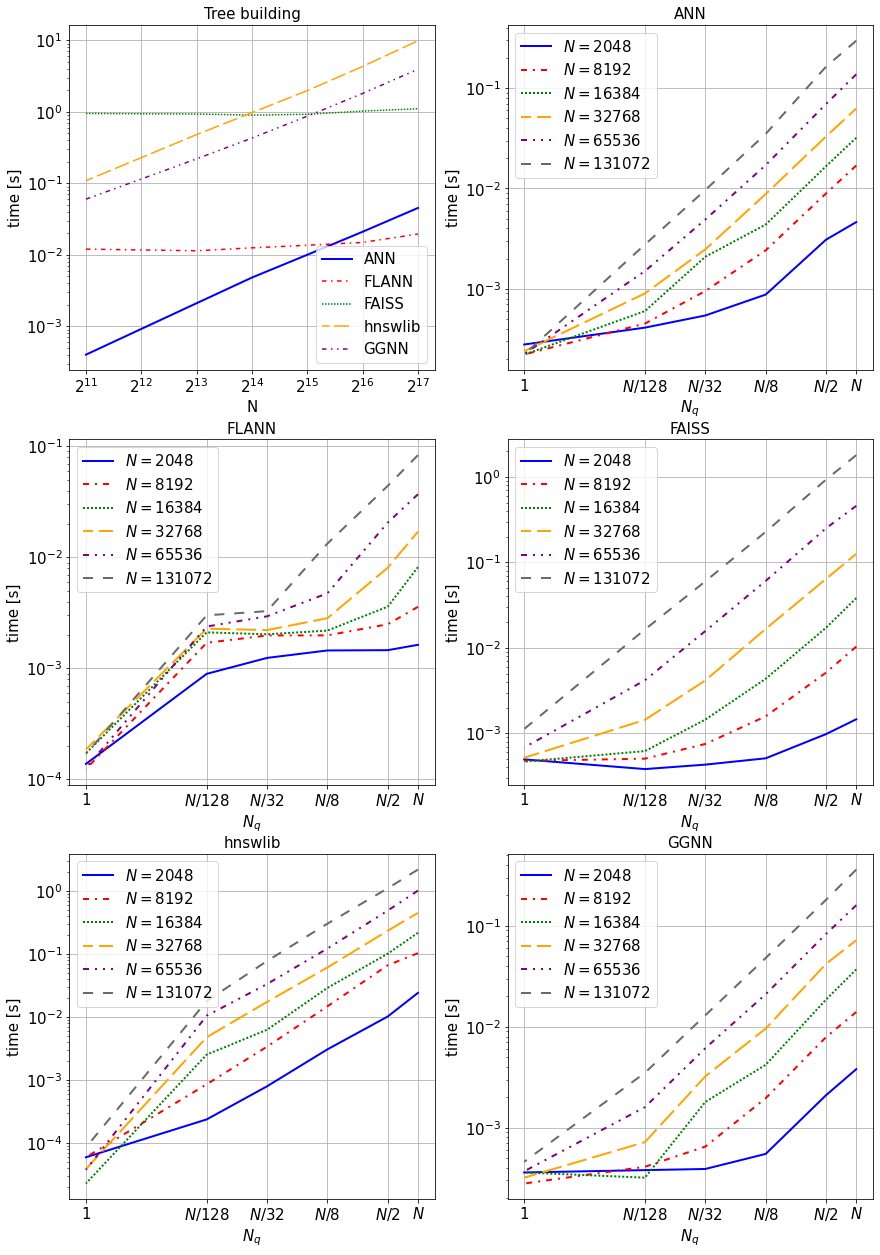

In [26]:
# %matplotlib widget

fig = plt.figure(666, figsize=[n*4.8*2,n*4.8*3])
gs = fig.add_gridspec(3,2)#, hspace=0)
axs = gs.subplots()#sharex=True, sharey=True)

# fig = plt.figure(666, figsize=[n*4.8,n*4.8])
# ax  = fig.add_subplot()
_ = axs[0,0].plot(N, ANN_treecpu[:,0], linestyle=lin[0], linewidth=lw, color=col[0], label = r'ANN')
_ = axs[0,0].plot(N, FLANN_treegpu[:,0], linestyle=lin[1], color=col[1], label = r'FLANN')
_ = axs[0,0].plot(N, FAISS_treegpu[:,0], linestyle=lin[2], color=col[2], label = r'FAISS')
_ = axs[0,0].plot(N, hnswlib_treecpu[:,0], linestyle=lin[3], color=col[3], label = r'hnswlib')
_ = axs[0,0].plot(N, GGNN_treegpu[:,0], linestyle=lin[4], color=col[4], label = r'GGNN')
_ = axs[0,0].set_xscale("log", base=2)
_ = axs[0,0].set_yscale("log", base=10)
_ = axs[0,0].legend(fontsize=fs)
_ = axs[0,0].set_xlabel('N', fontsize=fs)
_ = axs[0,0].set_ylabel('time [s]', fontsize=fs)
_ = axs[0,0].tick_params(axis='both', labelsize=fs)
_ = axs[0,0].set_title(r"Tree building"%N,fontsize=fs)
_ = axs[0,0].grid()

def plot_1_tree(ax,tree, title):
    for i in range(6):
        _ = ax.semilogy(search[:,0], tree[i,1:], linestyle=lin[i], linewidth=lw, color=col[i], label = r'$N=%d$'%N[i])#, label='%d (2^%d) stars'%(N[i],np.log2(N[i])))
    _ = ax.set_xscale("log", base=2)
    _ = ax.set_yscale("log", base=10)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_xlabel(r'$N_q$', fontsize=fs)
    _ = ax.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=search[:,0], labels=labs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.set_title(title,fontsize=fs)
    _ = ax.grid()
        
plot_1_tree(axs[0,1],ANN_treecpu, r"ANN")
plot_1_tree(axs[1,0],FLANN_treegpu, r"FLANN")
plot_1_tree(axs[1,1],FAISS_treegpu, r"FAISS")
plot_1_tree(axs[2,0],hnswlib_treecpu, r"hnswlib")
plot_1_tree(axs[2,1],GGNN_treegpu, r"GGNN")

if(SAVE):
    _ = plt.savefig(save_d+"trees.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

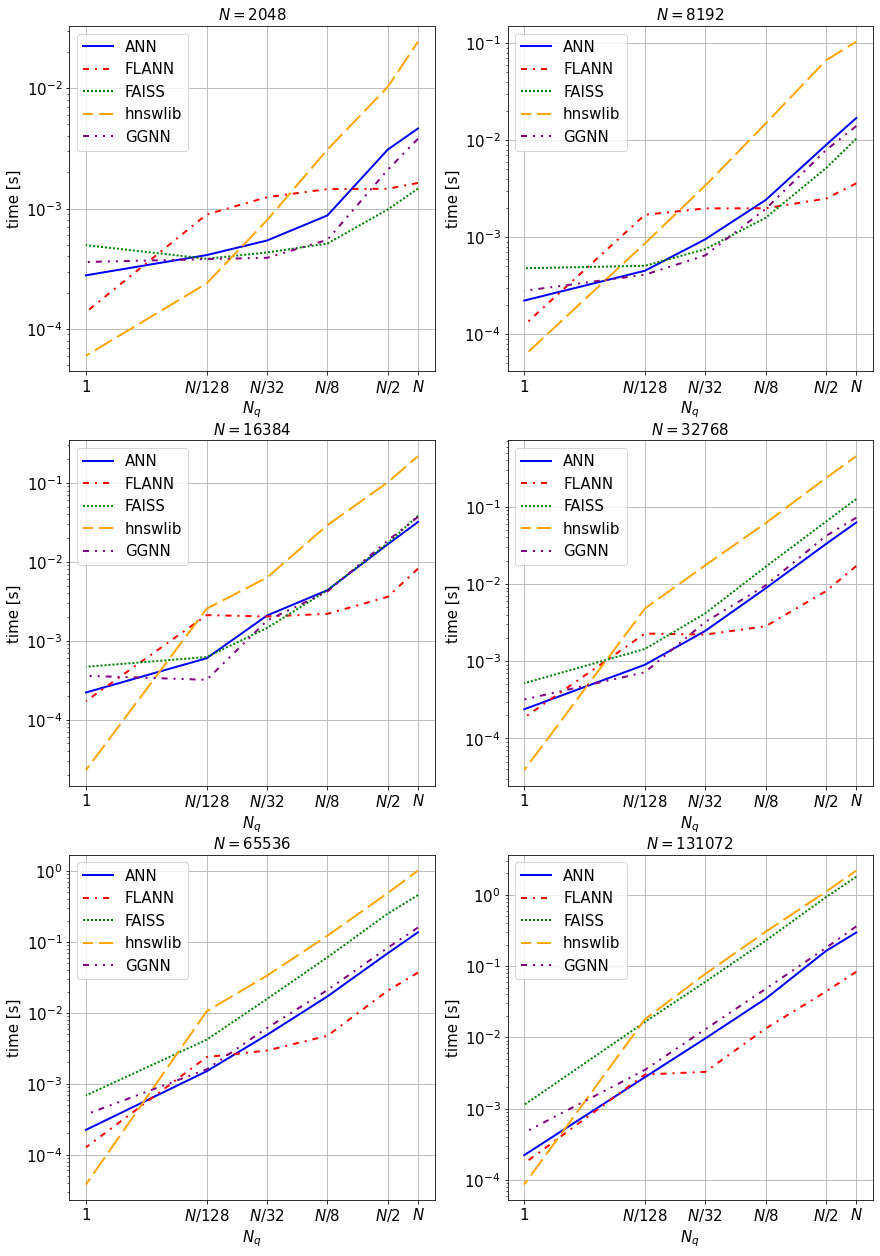

In [27]:
# %matplotlib widget
def plot_tree_comp(i,ax):
    _ = ax.plot(search[:,0], ANN_treecpu[i,1:], linestyle=lin[0], linewidth=lw, color=col[0], label = 'ANN')
    _ = ax.plot(search[:,0], FLANN_treegpu[i,1:], linestyle=lin[1], linewidth=lw, color=col[1], label = 'FLANN')
    _ = ax.plot(search[:,0], FAISS_treegpu[i,1:], linestyle=lin[2], linewidth=lw, color=col[2], label = 'FAISS')
    _ = ax.plot(search[:,0], hnswlib_treecpu[i,1:], linestyle=lin[3], linewidth=lw, color=col[3], label = 'hnswlib')
    _ = ax.plot(search[:,0], GGNN_treegpu[i,1:], linestyle=lin[4], linewidth=lw, color=col[4], label = 'GGNN')
    _ = ax.set_xscale("log", base=2)
    _ = ax.set_yscale("log", base=10)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_xlabel(r'$N_q$', fontsize=fs)
    _ = ax.set_ylabel('time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=search[:,0], labels=labs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.set_title(r"$N = %d$"%N[i],fontsize=fs)
    _ = ax.grid()
    
fig = plt.figure(666, figsize=[n*4.8*2,n*4.8*3])
gs = fig.add_gridspec(3,2)#, hspace=0)
axs = gs.subplots()#sharex=True, sharey=True)

plot_tree_comp(0,axs[0,0])
plot_tree_comp(1,axs[0,1])
plot_tree_comp(2,axs[1,0])
plot_tree_comp(3,axs[1,1])
plot_tree_comp(4,axs[2,0])
plot_tree_comp(5,axs[2,1])
    

if(SAVE):
    _ = plt.savefig(save_d+"treesN.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)